In [31]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [32]:
trainDF = pd.read_csv('train.csv')
trainDF.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [33]:
testDF = pd.read_csv('test.csv')
testDF.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [34]:
# concatDF = pd.concat([trainDF,testDF])
concatDF = pd.concat([trainDF,testDF])

concatDF.loc[concatDF['Gender']=='Male',['Gender']]=0
concatDF.loc[concatDF['Gender']=='Female',['Gender']]=1
concatDF['Gender']=concatDF['Gender'].astype(float)

concatDF['Age']=concatDF['Age']/concatDF['Age'].max()

concatDF.loc[concatDF['Vehicle_Age']=='< 1 Year',['Vehicle_Age']]=0
concatDF.loc[concatDF['Vehicle_Age']=='1-2 Year',['Vehicle_Age']]=0.5
concatDF.loc[concatDF['Vehicle_Age']=='> 2 Years',['Vehicle_Age']]=1
concatDF['Vehicle_Age']=concatDF['Vehicle_Age'].astype(float)

concatDF['Annual_Premium']=concatDF['Annual_Premium']/concatDF['Annual_Premium'].max()

concatDF['Vintage']=concatDF['Vintage']/concatDF['Vintage'].max()

concatDF.loc[concatDF['Vehicle_Damage']=='No',['Vehicle_Damage']]=0
concatDF.loc[concatDF['Vehicle_Damage']=='Yes',['Vehicle_Damage']]=1

concatDF['Vehicle_Damage']=concatDF['Vehicle_Damage'].astype(float)

concatDF['id']=concatDF['id'].astype(str)

concatDF['Driving_License']=concatDF['Driving_License'].astype(float)

concatDF['Previously_Insured']=concatDF['Previously_Insured'].astype(float)

print(concatDF.info())
concatDF.head()


<class 'pandas.core.frame.DataFrame'>
Index: 19174664 entries, 0 to 7669865
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    object 
 1   Gender                float64
 2   Age                   float64
 3   Driving_License       float64
 4   Region_Code           float64
 5   Previously_Insured    float64
 6   Vehicle_Age           float64
 7   Vehicle_Damage        float64
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               float64
 11  Response              float64
dtypes: float64(11), object(1)
memory usage: 1.9+ GB
None


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.0,0.247059,1.0,35.0,0.0,0.5,1.0,0.120521,124.0,0.625418,0.0
1,1,0.0,0.505882,1.0,28.0,0.0,1.0,1.0,0.109061,26.0,0.963211,1.0
2,2,1.0,0.294118,1.0,14.0,1.0,0.0,0.0,0.070428,152.0,0.849498,0.0
3,3,1.0,0.411765,1.0,1.0,0.0,0.5,1.0,0.004869,156.0,0.254181,0.0
4,4,1.0,0.423529,1.0,15.0,1.0,0.5,0.0,0.059150,152.0,0.983278,0.0


In [35]:
testDF=concatDF[len(trainDF):]
testDF

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,11504798,1.0,0.235294,1.0,47.0,0.0,0.0,0.0,0.004869,160.0,0.762542,NaN
1,11504799,0.0,0.552941,1.0,28.0,0.0,0.5,1.0,0.069392,124.0,0.411371,NaN
2,11504800,0.0,0.552941,1.0,43.0,0.0,0.5,1.0,0.004869,26.0,0.906355,NaN
3,11504801,1.0,0.258824,1.0,47.0,1.0,0.0,0.0,0.045360,152.0,0.384615,NaN
4,11504802,0.0,0.600000,1.0,19.0,0.0,0.5,0.0,0.063157,124.0,0.494983,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,0.0,0.670588,1.0,28.0,0.0,0.5,1.0,0.095639,124.0,0.364548,NaN
7669862,19174660,0.0,0.329412,1.0,50.0,1.0,0.0,0.0,0.047487,152.0,0.615385,NaN
7669863,19174661,0.0,0.552941,1.0,33.0,1.0,0.5,0.0,0.004869,138.0,0.210702,NaN
7669864,19174662,0.0,0.352941,1.0,28.0,0.0,0.0,1.0,0.071952,124.0,0.397993,NaN


In [36]:
trainDF=concatDF[:len(trainDF)]
trainDF

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.0,0.247059,1.0,35.0,0.0,0.5,1.0,0.120521,124.0,0.625418,0.0
1,1,0.0,0.505882,1.0,28.0,0.0,1.0,1.0,0.109061,26.0,0.963211,1.0
2,2,1.0,0.294118,1.0,14.0,1.0,0.0,0.0,0.070428,152.0,0.849498,0.0
3,3,1.0,0.411765,1.0,1.0,0.0,0.5,1.0,0.004869,156.0,0.254181,0.0
4,4,1.0,0.423529,1.0,15.0,1.0,0.5,0.0,0.059150,152.0,0.983278,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,0.0,0.564706,1.0,6.0,0.0,0.5,1.0,0.050747,26.0,0.729097,0.0
11504794,11504794,1.0,0.305882,1.0,36.0,0.0,0.0,1.0,0.054630,152.0,0.384615,1.0
11504795,11504795,1.0,0.341176,1.0,32.0,1.0,0.0,0.0,0.004869,152.0,0.632107,0.0
11504796,11504796,1.0,0.600000,1.0,28.0,0.0,0.5,1.0,0.089682,26.0,0.916388,1.0


In [37]:
falseDF=trainDF[trainDF['Response']==0]
falseDF

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.0,0.247059,1.0,35.0,0.0,0.5,1.0,0.120521,124.0,0.625418,0.0
2,2,1.0,0.294118,1.0,14.0,1.0,0.0,0.0,0.070428,152.0,0.849498,0.0
3,3,1.0,0.411765,1.0,1.0,0.0,0.5,1.0,0.004869,156.0,0.254181,0.0
4,4,1.0,0.423529,1.0,15.0,1.0,0.5,0.0,0.059150,152.0,0.983278,0.0
5,5,1.0,0.364706,1.0,47.0,1.0,0.0,0.0,0.052114,152.0,0.658863,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504791,11504791,1.0,0.364706,1.0,32.0,1.0,0.0,0.0,0.004869,152.0,0.682274,0.0
11504792,11504792,0.0,0.400000,1.0,28.0,1.0,0.5,0.0,0.055490,154.0,0.672241,0.0
11504793,11504793,0.0,0.564706,1.0,6.0,0.0,0.5,1.0,0.050747,26.0,0.729097,0.0
11504795,11504795,1.0,0.341176,1.0,32.0,1.0,0.0,0.0,0.004869,152.0,0.632107,0.0


In [38]:
trueDF=trainDF[trainDF['Response']==1]
trueDF

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,1,0.0,0.505882,1.0,28.0,0.0,1.0,1.0,0.109061,26.0,0.963211,1.0
7,7,1.0,0.552941,1.0,8.0,0.0,0.5,1.0,0.075271,26.0,0.876254,1.0
28,28,0.0,0.470588,1.0,35.0,0.0,0.5,1.0,0.004869,157.0,0.682274,1.0
36,36,1.0,0.588235,1.0,46.0,0.0,0.5,1.0,0.054146,124.0,0.913043,1.0
44,44,0.0,0.470588,1.0,8.0,0.0,0.5,1.0,0.067048,124.0,0.956522,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504732,11504732,0.0,0.529412,1.0,28.0,0.0,0.5,1.0,0.060241,124.0,0.301003,1.0
11504755,11504755,0.0,0.529412,1.0,36.0,0.0,0.5,1.0,0.069721,30.0,0.545151,1.0
11504784,11504784,0.0,0.294118,1.0,28.0,0.0,0.0,1.0,0.089306,153.0,0.123746,1.0
11504794,11504794,1.0,0.305882,1.0,36.0,0.0,0.0,1.0,0.054630,152.0,0.384615,1.0


In [39]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device

'cpu'

In [40]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, df:pd.DataFrame):
        self.id = df['id'].values
        df= df.drop(columns=['id'])

        if 'Response' in df.columns:
            self.response = df['Response'].values
            df= df.drop(columns=['Response'])

        # df = pd.get_dummies(df,columns=['Region_Code','Policy_Sales_Channel'])
        df= df.drop(columns=['Region_Code','Policy_Sales_Channel'])
        self.data = df.values
        pass

    def __len__(self):
        return len(self.id)

    def __getitem__(self, idx):
        x=self.data[idx]
        x=torch.tensor(x)
        # x=x.to(torch.float32)
        x=x.to(device)

        id = self.id[idx]

        y=self.response[idx]
        if y==0:
            y=[1,0]
        else:
            y=[0,1]
        y=torch.tensor(y)
        y=y.to(torch.float32)
        y=y.to(device)

        return id, x, y

# trainSet= MyDataset(concatDF[:len(trainDF)])
trueSet= MyDataset(trueDF)
falseSet= MyDataset(falseDF)
testSet= MyDataset(testDF)
trueSet[0]

('1',
 tensor([0.0000, 0.5059, 1.0000, 0.0000, 1.0000, 1.0000, 0.1091, 0.9632]),
 tensor([0., 1.]))

In [41]:
trueSplit = torch.utils.data.random_split(trueSet,(0.7,0.3))
falseSplit = torch.utils.data.random_split(falseSet,(0.7,0.3))
# trueSplit[0][0]
falseSplit[0][0]

('4540794',
 tensor([0.0000, 0.4941, 1.0000, 0.0000, 0.5000, 1.0000, 0.0655, 0.7759]),
 tensor([1., 0.]))

In [42]:
trainSet = torch.utils.data.ConcatDataset((trueSplit[0],falseSplit[0]))
valSet = torch.utils.data.ConcatDataset((trueSplit[1],falseSplit[1]))
trainSet[1]

('2526317',
 tensor([1.0000, 0.4471, 1.0000, 0.0000, 0.5000, 1.0000, 0.0602, 0.6288]),
 tensor([0., 1.]))

In [43]:
trueCNT = len(trueSplit[0])
falseCNT = len(falseSplit[0])
weight = trueCNT/(trueCNT+falseCNT)
weight

trueList = [1-weight for _ in range(trueCNT)]
len(trueList)

falseList = [weight for _ in range(falseCNT)]
len(falseList)

weightList = trueList+falseList
len(weightList)

0.12299735762464363

In [ ]:
trueCNT = len(trueSplit[1])
falseCNT = len(falseSplit[1])
weight = trueCNT/(trueCNT+falseCNT)
weight

trueList = [1-weight for _ in range(trueCNT)]
len(trueList)

falseList = [weight for _ in range(falseCNT)]
len(falseList)

val_weightList = trueList+falseList
len(val_weightList)

0.12299735762464363

In [70]:
# trainLoader=torch.utils.data.DataLoader(trainSet,batch_size=1024,sampler=torch.utils.data.WeightedRandomSampler(weightList,len(trainSet)))
trainLoader=torch.utils.data.DataLoader(trainSet,batch_size=1024,sampler=torch.utils.data.WeightedRandomSampler(weightList,1024*10))
# valLoader=torch.utils.data.DataLoader(valSet,batch_size=1024,sampler=torch.utils.data.RandomSampler(valSet))
valLoader=torch.utils.data.DataLoader(valSet,batch_size=1024,sampler=torch.utils.data.WeightedRandomSampler(val_weightList,1024))
testLoader = torch.utils.data.DataLoader(testSet,batch_size=1024)
trainLoader

In [18]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.convStack = torch.nn.Sequential(
            torch.nn.Linear(8, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 2),
        )

    def forward(self, x):
        logits = self.convStack(x)
        return logits

model = Net().to(device)
model

Net(
  (convStack): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
)

[1] cnt: 0 - val loss: 0.7337352633476257 - train loss: 0.6963764429092407
[1] cnt: 1 - val loss: 0.735016405582428 - train loss: 0.6942453384399414
[1] cnt: 0 - val loss: 0.6989423632621765 - train loss: 0.6955535411834717
[1] cnt: 1 - val loss: 0.715074896812439 - train loss: 0.6928784251213074
[1] cnt: 0 - val loss: 0.695029079914093 - train loss: 0.6921905279159546
[1] cnt: 1 - val loss: 0.7219582200050354 - train loss: 0.6898707151412964
[1] cnt: 2 - val loss: 0.7505002617835999 - train loss: 0.6863600015640259
[1] cnt: 3 - val loss: 0.7163899540901184 - train loss: 0.6857259273529053
[1] cnt: 4 - val loss: 0.7545977234840393 - train loss: 0.6788808107376099
[1] cnt: 0 - val loss: 0.6930783987045288 - train loss: 0.6771125793457031
[1] cnt: 1 - val loss: 0.7422415614128113 - train loss: 0.6651248931884766
[1] cnt: 0 - val loss: 0.683313250541687 - train loss: 0.6590129733085632
[1] cnt: 1 - val loss: 0.7026186585426331 - train loss: 0.639047384262085
[1] cnt: 0 - val loss: 0.67089

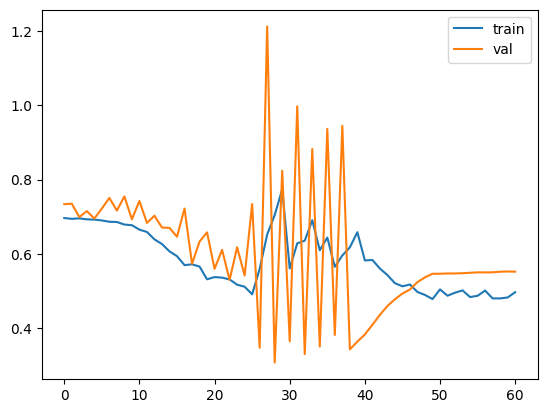

In [19]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(),lr=1)
trainHistory=[]
valHistory=[]
lrScheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

for phase in range(3):
    bestLoss = float('inf')
    cnt = 0
    bestModel = model

    while(cnt<10):
        model.train()
        trainLoss=0
        for  _, x, y in trainLoader:
            # Compute prediction error
            pred = model(x)
            loss = loss_fn(pred, y)
            trainLoss +=loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        model.eval()
        valLoss=0
        with torch.no_grad():
            for _, x,y in valLoader:
                pred = model(x)
                loss = loss_fn(pred, y)
                valLoss+=loss.item()

        trainHistory.append(trainLoss)

        valHistory.append(valLoss)

        if bestLoss < valLoss:
            cnt +=1
        else:
            bestLoss = valLoss
            bestModel = model
            cnt =0 

        print(f'{lrScheduler.get_last_lr()} cnt: {cnt} - val loss: {valLoss} - train loss: {trainLoss}')

    model = bestModel
    lrScheduler.step()

plt.plot(trainHistory,label='train')
plt.plot(valHistory, label='val')
plt.legend() 

In [20]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for _, x, y  in valLoader:
        pred = model(x)

        for idx, i in enumerate(pred):
            if torch.argmax(i)== torch.argmax(y[idx]):
                correct +=1 
            total+=1
correct / total


0.6484848484848484

In [21]:
model.eval()
result = []
with torch.no_grad():
    for id, X, _ in testLoader:
        pred = model(X)
        for idx, i in enumerate(pred):
            result.append([id[idx], torch.argmax(i).item()])

result

[['11504798', 0],
 ['11504799', 1],
 ['11504800', 1],
 ['11504801', 0],
 ['11504802', 0],
 ['11504803', 0],
 ['11504804', 1],
 ['11504805', 0],
 ['11504806', 0],
 ['11504807', 0],
 ['11504808', 1],
 ['11504809', 0],
 ['11504810', 0],
 ['11504811', 0],
 ['11504812', 0],
 ['11504813', 0],
 ['11504814', 0],
 ['11504815', 0],
 ['11504816', 0],
 ['11504817', 0],
 ['11504818', 1],
 ['11504819', 1],
 ['11504820', 1],
 ['11504821', 1],
 ['11504822', 0],
 ['11504823', 1],
 ['11504824', 0],
 ['11504825', 0],
 ['11504826', 1],
 ['11504827', 0],
 ['11504828', 0],
 ['11504829', 1],
 ['11504830', 1],
 ['11504831', 0],
 ['11504832', 1],
 ['11504833', 1],
 ['11504834', 0],
 ['11504835', 1],
 ['11504836', 0],
 ['11504837', 0],
 ['11504838', 0],
 ['11504839', 1],
 ['11504840', 1],
 ['11504841', 0],
 ['11504842', 1],
 ['11504843', 1],
 ['11504844', 0],
 ['11504845', 0],
 ['11504846', 1],
 ['11504847', 1],
 ['11504848', 0],
 ['11504849', 0],
 ['11504850', 0],
 ['11504851', 1],
 ['11504852', 0],
 ['1150485

In [22]:
outDF= pd.DataFrame(result)
outDF= outDF.astype(int)
outDF.columns=['id','Response']
outDF

,id,Response
0,11504798,0
1,11504799,1
2,11504800,1
3,11504801,0
4,11504802,0
...,...,...
95,11504893,0
96,11504894,0
97,11504895,0
98,11504896,1


In [23]:
outDF.to_csv('result.csv',index=False)